In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix , accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("file_name.csv")

In [3]:
print(data.shape)
print(data.columns.values)
print(data.isnull().sum())
print(data.info())
print(data.dtypes)
print(data.head())


(12854, 9)
['Title' 'Political Lean' 'Score' 'Id' 'Subreddit' 'URL' 'Num of Comments'
 'Text' 'Date Created']
Title                  0
Political Lean         0
Score                  0
Id                     0
Subreddit              0
URL                    0
Num of Comments        0
Text               10426
Date Created           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12854 entries, 0 to 12853
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            12854 non-null  object 
 1   Political Lean   12854 non-null  object 
 2   Score            12854 non-null  int64  
 3   Id               12854 non-null  object 
 4   Subreddit        12854 non-null  object 
 5   URL              12854 non-null  object 
 6   Num of Comments  12854 non-null  int64  
 7   Text             2428 non-null   object 
 8   Date Created     12854 non-null  float64
dtypes: float64(1), int64(2), object(6

In [4]:
data = data.drop(["Text","Id","Title"], axis=1)
print(data.isnull().sum())

Political Lean     0
Score              0
Subreddit          0
URL                0
Num of Comments    0
Date Created       0
dtype: int64


In [5]:
print(data["Political Lean"].unique())
print(data["Political Lean"].value_counts())

['Liberal' 'Conservative']
Liberal         8319
Conservative    4535
Name: Political Lean, dtype: int64


In [6]:
La = LabelEncoder()
data["Political Lean"] = La.fit_transform(data["Political Lean"])
data["Subreddit"] = La.fit_transform(data["Subreddit"])
data["URL"] = La.fit_transform(data["URL"])

In [7]:
print(data.dtypes)
print(data.head(3))

Political Lean       int32
Score                int64
Subreddit            int32
URL                  int32
Num of Comments      int64
Date Created       float64
dtype: object
   Political Lean  Score  Subreddit    URL  Num of Comments  Date Created
0               1      1         14   4396                0  1.646272e+09
1               1      6         10  10155                1  1.646271e+09
2               1      1          2   8242                1  1.646270e+09


In [8]:
x = data.drop("Political Lean",axis=1)
y = data["Political Lean"]

In [9]:
# scaling
ss = StandardScaler()
x = ss.fit_transform(x)
print(x[:5])

[[-0.23564975  1.51966609 -0.48940018 -0.31560422  0.38764792]
 [-0.22562708  0.61124457  1.13232571 -0.29904223  0.38763697]
 [-0.23564975 -1.20559846  0.59362774 -0.29904223  0.38762683]
 [-0.22362254 -0.29717695  1.68200602 -0.26591825  0.3876108 ]
 [-0.22562708  0.61124457 -1.1894541  -0.29904223  0.38758912]]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle =True)
print(X_train.shape)

(8997, 5)


In [11]:
# Logistic_model
Lo = LogisticRegression()
Lo.fit(X_train, y_train)

print("_"*100)
print(Lo.score(X_train, y_train))
print(Lo.score(X_test, y_test))
print("_"*100)

____________________________________________________________________________________________________
0.6917861509392019
0.6927663987555095
____________________________________________________________________________________________________


In [12]:
# print("_"*150)
# for x in range(2,20):
#     Dt = DecisionTreeClassifier(max_depth=x,random_state=33)
#     Dt.fit(X_train, y_train)

#     print("x = ", x)
#     print(Dt.score(X_train, y_train))
#     print(Dt.score(X_test, y_test))
#     print("_"*100)



# LinearRegression_model

# x = data.drop("Score",axis=1)
# y = data["Score"]

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle =True)
# print(X_train.shape)

# Li = LinearRegression()
# Li.fit(X_train, y_train)

# print("_"*100)
# print(Li.score(X_train, y_train))
# print(Li.score(X_test, y_test))
# print("_"*100)

In [15]:
# DecisionTreeClassifier_model
print("_"*100)
Dt = DecisionTreeClassifier(max_depth=15,random_state=33)
Dt.fit(X_train, y_train)

print(Dt.score(X_train, y_train))
print(Dt.score(X_test, y_test))

____________________________________________________________________________________________________
1.0
1.0


In [16]:
y_pred = Dt.predict(X_test)

[[1344    0]
 [   0 2513]]


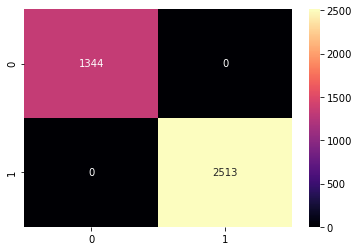

In [17]:
# confusion_matrix
Cm = confusion_matrix(y_test,y_pred)
print(Cm)
sns.heatmap(Cm,annot=True, fmt="d", cmap="magma")
plt.show()

In [18]:
# accuracy_score
As = accuracy_score(y_test,y_pred)
print(As)

1.0


In [19]:
# The autput result
result = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
# result.to_csv("The autput.csv",index=False)